In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('assets/Insurance-Reto.xlsx')
df.head()

,Edad del contratante,Género,Indice de masa corporal,Cantidad de hijos,Fumador,Costo Póliza
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,33,male,22.705,0,no,21984.47061
3,32,male,28.880,0,no,3866.85520
4,31,female,25.740,0,no,3756.62160


In [33]:
def distribution_plot(z_calculated: float, z_teoric: float, gl = 0):
    limit = np.clip(round(3 + abs(z_calculated) if (abs(z_calculated) > abs(z_teoric)) else 3 + abs(z_teoric)), 4, a_max= None)
    # Normal distribution plot
    x_axis = np.arange(-limit, limit, 0.005)
    y_axis = stats.norm.pdf(x_axis) if (gl == 0) else stats.t.pdf(x_axis, gl)
    ax = sns.lineplot(x=x_axis, y=y_axis)
    ax.set(title='Distribución Z' if (gl == 0) else f'Distribución T con {gl} grados de libertad' )

    # Fill Ha area
    plot_t = round((abs(limit)-abs(z_teoric)) / 0.005)
    ax.fill_between(x_axis[:plot_t], y_axis[:plot_t], color="blue", alpha=0.3);

    # Teoric annotation
    teoric_height = y_axis[plot_t]
    teoric_x = round(z_teoric, 3)
    ax.annotate(
        f'Z.t={teoric_x}',
        xy=(teoric_x, teoric_height),
        xytext=(0.2, 0.75),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords=ax.transAxes,
    );

    # Calculated annotation
    plot_c = round((limit-abs(z_calculated)) / 0.005)
    ax.fill_between([x_axis[plot_c]], [y_axis[plot_c]], color="red", alpha=0.3);
    calculated_height = y_axis[plot_c]
    calculated_x = round(z_calculated, 3)
    ax.annotate(
        f'Z.c={calculated_x}',
        xy=(calculated_x, calculated_height),
        xytext=(10, 50),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords='offset points',
    );
    return ax

In [5]:
def chi2_plot(chi_calculated: float, chi_teoric: float, gl: int):
    limit = 10 + chi_calculated if (chi_calculated > chi_teoric) else 10 + chi_teoric
    # Normal distribution plot
    x_axis = np.arange(0, limit, 0.005)
    y_axis = stats.chi2.pdf(x_axis, gl)
    ax = sns.lineplot(x=x_axis, y=y_axis)
    ax.set(title=f'Distribución X^2 con {gl} grados de libertad' )

    # Fill Ha area
    plot_t = round(chi_teoric / 0.005)
    ax.fill_between(x_axis[plot_t:], y_axis[plot_t:], color="blue", alpha=0.15);

    # Teoric annotation
    teoric_height = y_axis[plot_t] / 2
    teoric_x = round(chi_teoric, 3)
    ax.annotate(
        f'x^2.t={teoric_x}',
        xy=(teoric_x, teoric_height),
        xytext=(0.2, 0.75),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords=ax.transAxes,
    );

    # Calculated annotation
    plot_c = round(chi_calculated / 0.005)
    ax.fill_between([x_axis[plot_c]], [y_axis[plot_c]], color="red", alpha=0.8);
    calculated_height = y_axis[plot_c] * 0.8
    calculated_x = round(chi_calculated, 3)
    ax.annotate(
        f'x^2.c={calculated_x}',
        xy=(calculated_x, calculated_height),
        xytext=(0.25, 0.9),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords=ax.transAxes,
    );
    return ax

In [6]:
def f_plot(f_calculated: float, f_teoric: float, gl: int, d_gl: int):
    limit = 10 + f_calculated if (f_calculated > f_teoric) else 10 + f_teoric
    # Normal distribution plot
    x_axis = np.arange(0, limit, 0.005)
    y_axis = stats.f.pdf(x_axis, gl, d_gl)
    ax = sns.lineplot(x=x_axis, y=y_axis)
    ax.set(title=f'Distribución F con {gl} grados de libertad y {d_gl} grados de libertad en el denominador' )

    # Fill Ha area
    plot_t = round(f_teoric / 0.005)
    ax.fill_between(x_axis[plot_t:], y_axis[plot_t:], color="blue", alpha=0.15);

    # Teoric annotation
    teoric_height = y_axis[plot_t] / 2
    teoric_x = round(f_teoric, 3)
    ax.annotate(
        f'f.t={teoric_x}',
        xy=(teoric_x, teoric_height),
        xytext=(0.2, 0.5),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords=ax.transAxes,
    );

    # Calculated annotation
    plot_c = round(f_calculated / 0.005)
    ax.fill_between([x_axis[plot_c]], [y_axis[plot_c]], color="red", alpha=0.8);
    calculated_height = y_axis[plot_c] * 0.8
    calculated_x = round(f_calculated, 3)
    ax.annotate(
        f'f.c={calculated_x}',
        xy=(calculated_x, calculated_height),
        xytext=(0.35, 0.4),
        arrowprops=dict(arrowstyle='->', color='black'),
        textcoords=ax.transAxes,
    );
    return ax

### 1. Análisis inferencial para comprobar que en promedio las personas pagan menos de $9480

se comprueba la hipotesis nula. En promedio las personas pagan más de $9480 con un nivel de confianza del 95%
calculado = 9.853459446924203, teórico = -1.6448536269514729 y p-value = 1.0


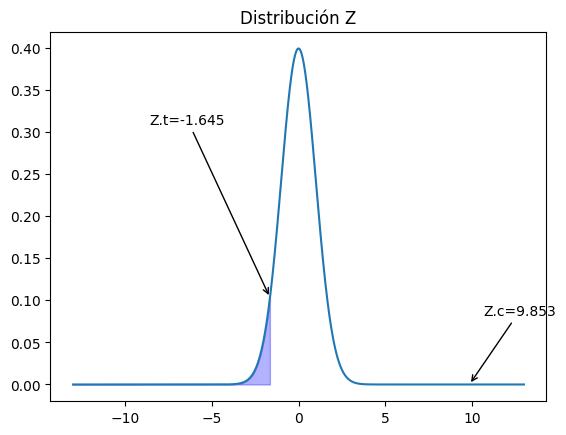

In [34]:
# Monto promedio menor a $9480
# H0: mu >= 9480
# Ha: mu < 9480

def validate_left_tail_test(serie: pd.Series, limit: float, alpha = 0.05):
    mean_cost = serie.mean()
    n_cost = serie.count()
    cost_std = serie.std()

    c_value = (mean_cost - limit) / (cost_std / math.sqrt(n_cost))
    teoric_value = 0
    p_value = 0

    # Validar Z o t-student
    gl = 0
    if (n_cost >= 30):
        teoric_value = stats.norm.ppf(alpha)
        p_value = stats.norm.cdf(c_value)
    else:
        gl = n_cost - 1
        teoric_value = stats.t.ppf(alpha, gl)
        p_value = stats.t.cdf(c_value, gl)
    return c_value, teoric_value, p_value, gl

h_limit = 9480
cost_serie = df['Costo Póliza']
calculated, teoric, pvalue, gl = validate_left_tail_test(cost_serie, h_limit)

if (calculated <= teoric):
    print(f'se comprueba la hipotesis alterna. En promedio las personas pagan menos de $9480 con un nivel de confianza del 95%')
else:
    print(f'se comprueba la hipotesis nula. En promedio las personas pagan más de $9480 con un nivel de confianza del 95%')

print(f'calculado = {calculated}, teórico = {teoric} y p-value = {pvalue}')
ax = distribution_plot(calculated, teoric, gl)

### 2. Análisis inferencial comparativo del IMC de hombres y mujeres para comprobar si las mujeres se cuidan más

se comprueba la hipotesis alterna. Las mujeres tienen un IMC promedio más bajo que los hombres, por lo tanto si se cuidan más con un nivel de confianza del 95%
gl = 1136, calculado = -1.7756095009188753, teórico = -1.6461960742122785 y p-value = 0.03803248382759542


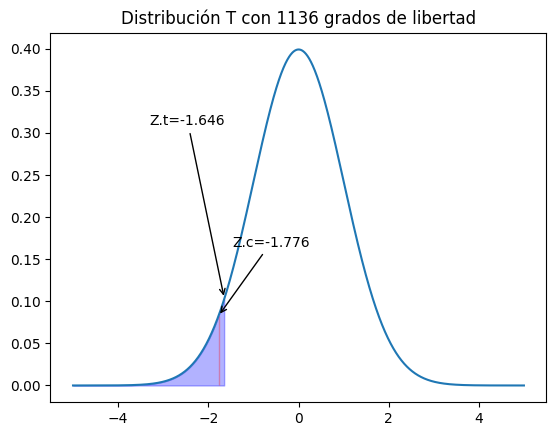

In [41]:
# Comparar si las mujeres se cuidan más que los hombres (IMC)
# H0: mean(mujeres) - mean(hombres) >= 0
# Ha: mean(mujeres) - mean(hombres) < 0

male_df = df.loc[df['Género'] == 'male', 'Indice de masa corporal']
female_df = df.loc[df['Género'] == 'female', 'Indice de masa corporal']

def validate_left_tail_test_two_mean(sample1: pd.Series, sample2: pd.Series, diff = 0, alpha = 0.05):
    x1 = sample1.mean()
    n1 = sample1.count()
    s1 = sample1.var()

    x2 = sample2.mean()
    n2 = sample2.count()
    s2 = sample2.var()

    gl = n1 + n2 - 2
    math.floor((((s1/n1) + (s2/n2)) ** 2) / ((1/(n1 - 1) * ((s1/n1) ** 2)) + (1/(n2 - 1) * ((s2/n2) ** 2))))
    
    c_value = (x1 - x2 - diff) / math.sqrt((s1/n1) + (s2/n2))
    teoric_value = stats.t.ppf(alpha, gl)
    p_value = stats.t.cdf(c_value, gl)
    
    return gl, c_value, teoric_value, p_value

gl, calculated, teoric, pvalue = validate_left_tail_test_two_mean(female_df, male_df)

if (calculated <= teoric):
    print(f'se comprueba la hipotesis alterna. Las mujeres tienen un IMC promedio más bajo que los hombres, por lo tanto si se cuidan más con un nivel de confianza del 95%')
else:
    print(f'se comprueba la hipotesis nula. Las mujeres no se cuidan más que los hombres con un nivel de confianza del 95%')
    
print(f'gl = {gl}, calculado = {calculated}, teórico = {teoric} y p-value = {pvalue}')
ax = distribution_plot(calculated, teoric, gl)

### 3. Análisis de costo con respecto a cantidad de hijos

In [42]:
def comparatorT(dataFrame: pd.DataFrame, columnA: str, columnB: str, meanName: str, quantityName: str, CME: float, alpha: float = 0.05, gl: int = 1) -> pd.Series:
    proveedorA = pd.Series(dataFrame[columnA])
    proveedorB = pd.Series(dataFrame[columnB])
    mediaA = proveedorA[meanName]
    mediaB = proveedorB[meanName]
    nA = proveedorA[quantityName]
    nB = proveedorB[quantityName]
    tStudent = round((mediaA - mediaB)/ math.sqrt(CME * (1/nA + 1/nB)), 2)
    # como es de doble cola se multiplica por 2
    pValue = round(stats.t.sf(math.fabs(tStudent), gl) * 2, 3)
    return pd.Series(
        {
            'Comparación': f'{columnA} - {columnB}',
            'Media xi': mediaA,
            'Media xj': mediaB,
            'ni': proveedorA[quantityName],
            'nj': proveedorB[quantityName],
            'CME': CME,
            'valor-p': pValue,
            '¿RechazarH0?': pValue <= alpha,
        }
    )

gl = 2, gl del error = 1135, gl total = 1137
No todos los promedios son iguales


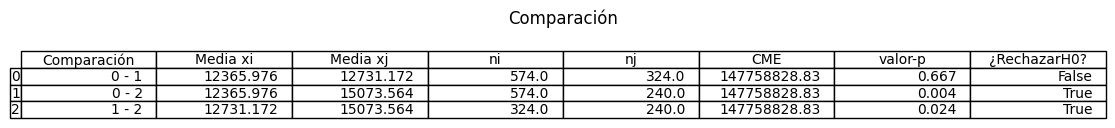

In [55]:
# Ho: promedio de costos de n hijos == promedio de costos de n+1 hijos
# Ha: no todos los promedios son iguales

cost_kids_df = df.loc[:, ['Cantidad de hijos', 'Costo Póliza']]
group = cost_kids_df.sort_values(by='Cantidad de hijos').groupby(by='Cantidad de hijos')['Costo Póliza']

count_serie = group.count().rename('Cuenta')
sum_serie = group.sum().rename('Suma')
mean_serie = group.mean().round(3).rename('Promedio')
var_serie = group.var().rename('Varianza')

summary_kids_cost = pd.concat([count_serie, sum_serie, mean_serie, var_serie], axis=1)

sc_k = summary_kids_cost.shape[0]
sc_N = summary_kids_cost['Cuenta'].sum()
sc_gl = sc_k - 1
sc_e_gl = sc_N - sc_k
sc_total = sc_N - 1

print(f'gl = {sc_gl}, gl del error = {sc_e_gl}, gl total = {sc_total}')
SCE = summary_kids_cost['Cuenta'].subtract(1).multiply(summary_kids_cost['Varianza']).sum()
CME = round(SCE / sc_e_gl, 2)

lista = []
transpose = summary_kids_cost.T
columns = summary_kids_cost.T.columns.to_list()
columnsLength = len(columns)
for i in range(0, columnsLength):
    for j in range(1 + i, columnsLength):
        columnA = columns[i]
        columnB = columns[j]
        result = comparatorT(transpose, columnA, columnB, CME = CME, gl=sc_e_gl, meanName='Promedio', quantityName='Cuenta')
        lista.append(result)

result = pd.DataFrame(lista)

if (result['¿RechazarH0?'].any()):
    print('No todos los promedios son iguales')
else:
    print('Se comprueba la hipotesis nula de que todos los promedios son iguales')

result.head()


### show tables
fig, (ax) = plt.subplots(1, 1, figsize = (14, .25))

ax.table(cellText = result.values, rowLabels = result.index, colLabels = result.columns)
ax.set_title('Comparación')
ax.axis('off');

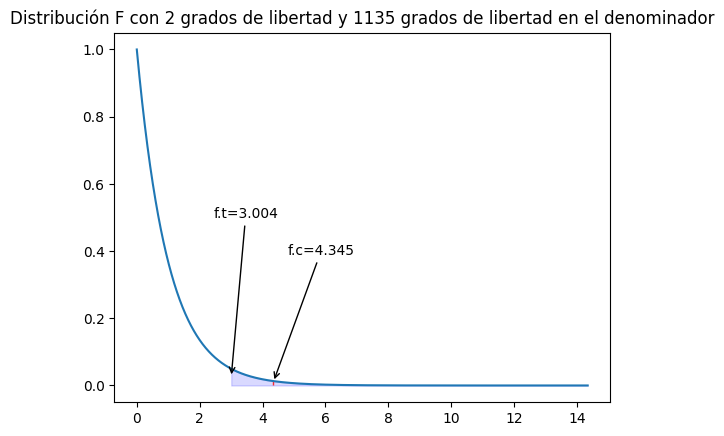

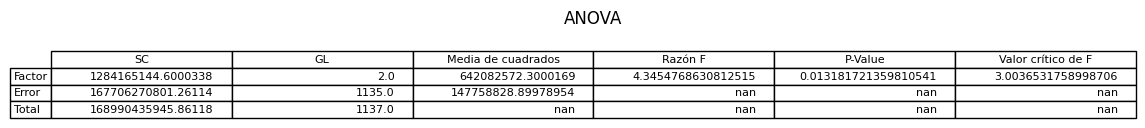

In [44]:
general_mean = round(df['Costo Póliza'].mean(), 3)

sc_factor = mean_serie.subtract(general_mean).repeat(count_serie.to_list()).pow(2).sum()
sf_total = cost_kids_df['Costo Póliza'].subtract(general_mean).pow(2).sum()
sf_error = sf_total - sc_factor

mean_square_factor = sc_factor/sc_gl
mean_square_error = sf_error/sc_e_gl

f_calculated = mean_square_factor / mean_square_error
f_teoric = stats.f.ppf(0.95, sc_gl, sc_e_gl)
p_value = stats.f.sf(f_calculated, sc_gl, sc_e_gl)

f_table = pd.DataFrame(
    {
        'SC': {'Factor': sc_factor, 'Error': sf_error, 'Total': sf_total},
        'GL': {'Factor': sc_gl, 'Error': sc_e_gl, 'Total': sc_total},
        'Media de cuadrados': {'Factor': mean_square_factor, 'Error': mean_square_error},
        'Razón F': {'Factor': f_calculated},
        'P-Value': {'Factor': p_value},
        'Valor crítico de F': {'Factor': f_teoric},
    },
)

f_plot(f_calculated, f_teoric, sc_gl, sc_e_gl);
### show tables
fig, ax = plt.subplots(figsize = (14, .25))

ax.table(cellText = f_table.values, rowLabels = f_table.index, colLabels = f_table.columns)
ax.set_title('ANOVA')
ax.axis('off');

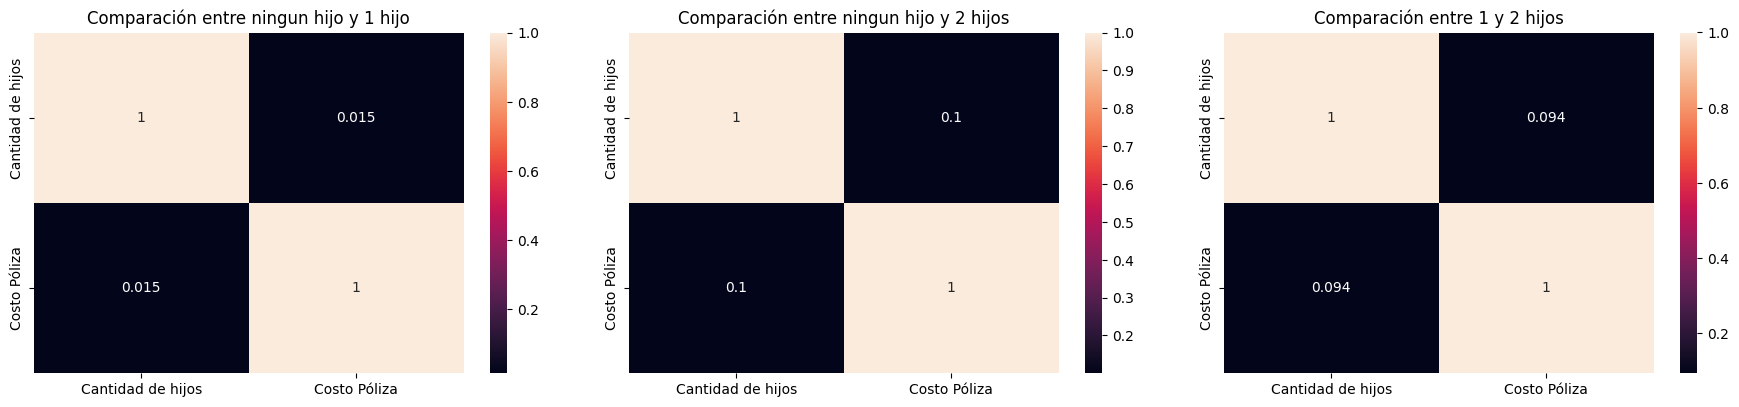

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
fig.tight_layout()

sns.heatmap(cost_kids_df[cost_kids_df['Cantidad de hijos'].isin([0, 1])].corr(), annot=True, ax=ax1)
ax1.title.set_text('Comparación entre ningun hijo y 1 hijo')

sns.heatmap(cost_kids_df[cost_kids_df['Cantidad de hijos'].isin([0, 2])].corr(), annot=True, ax=ax2)
ax2.title.set_text('Comparación entre ningun hijo y 2 hijos')

sns.heatmap(cost_kids_df[cost_kids_df['Cantidad de hijos'].isin([1, 2])].corr(), annot=True, ax=ax3)
ax3.title.set_text('Comparación entre 1 y 2 hijos')

### 4. Correlación de género con # de hijos usando X^2

gl = 2, calculado = 0.21044349889493905, teórico = 5.991464547107979 y p-value = 0.9001248982549495
No se rechaza la hipotesis nula. La cantidad de hijos es independiente de si el contratante es mujer u hombre


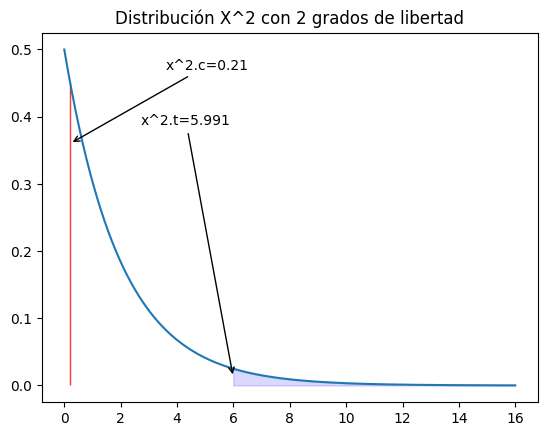

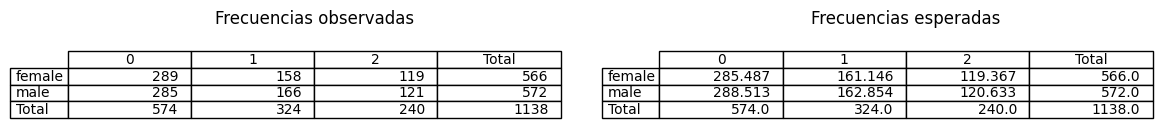

In [60]:
gender_kids_df = df.loc[:, ['Cantidad de hijos', 'Género']]
group = gender_kids_df.groupby(by='Género')

child_values = df['Cantidad de hijos'].unique()

observed_df = pd.DataFrame()

for child_count in child_values:
    group = gender_kids_df.where(gender_kids_df['Cantidad de hijos'] == child_count).groupby(by='Género', as_index=True).count().rename(columns={'Cantidad de hijos': child_count})
    observed_df = pd.concat([observed_df, group], axis=1)
    
col_total = observed_df.T.sum()
total_observed_df = pd.concat([observed_df, col_total.rename('Total')], axis=1)

row_total = total_observed_df.sum()
total_observed_df = pd.concat([total_observed_df, row_total.rename('Total').to_frame().T], axis=0)

total_observed_df.style.set_caption("Frecuencias observadas")
total_observed_df

expected_df = pd.DataFrame()
total = total_observed_df['Total']['Total']

for col in observed_df.columns.to_list():
    serie = pd.Series(dtype='float64')
    for row in observed_df.index.to_list():
        total_col = total_observed_df[col]['Total']
        total_row = total_observed_df['Total'][row]
        result = total_col * total_row / total
        serie.at[row] = result
    expected_df = pd.concat([expected_df, serie.to_frame(col)], axis=1)

total_expected_df = pd.concat([expected_df, col_total.rename('Total')], axis=1)
total_expected_df = pd.concat([total_expected_df, row_total.rename('Total').to_frame().T], axis=0)

total_expected_df

chi = observed_df.sub(expected_df).pow(2).div(expected_df)

chi_total = np.nansum(chi)
chi_gl = (len(observed_df.index) - 1) * (len(observed_df.columns) - 1)
chi_p = stats.chi2.sf(chi_total, chi_gl)
chi_teoric = stats.chi2.ppf(0.95, chi_gl)

print(f'gl = {chi_gl}, calculado = {chi_total}, teórico = {chi_teoric} y p-value = {chi_p}')

if (chi_total > chi_teoric):
    print(f'se rechaza la hipotesis nula. La cantidad de hijos no es independiente de si el contratante es mujer u hombre')
else:
    print(f'No se rechaza la hipotesis nula. La cantidad de hijos es independiente de si el contratante es mujer u hombre')
    
chi2_plot(chi_total, chi_teoric, 2);

### show tables
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (14, .25))

ax.table(cellText = total_observed_df.values, rowLabels = total_observed_df.index, colLabels = total_observed_df.columns)
ax.set_title('Frecuencias observadas')
ax.axis('off');

ax1.table(cellText = total_expected_df.values.round(3), rowLabels = total_expected_df.index, colLabels = total_expected_df.columns)
ax1.set_title('Frecuencias esperadas')
ax1.axis('off');

<Axes: >

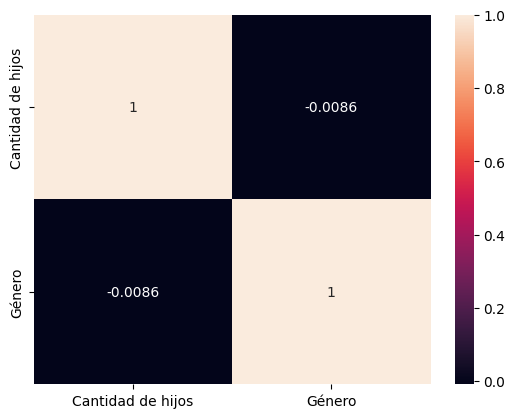

In [62]:
sns.heatmap(gender_kids_df.replace({'female': True, 'male': False}).corr(method ='pearson'), annot=True)

### 5. Correlación entre el costo de la póliza y si el contratante es fumador

gl = 2, calculado = 552.393417619719, teórico = 5.991464547107979 y p-value = 1.1201945207033703e-120
se rechaza la hipotesis nula. El precio de la poliza no es independiente de si el contratante es fumador o no


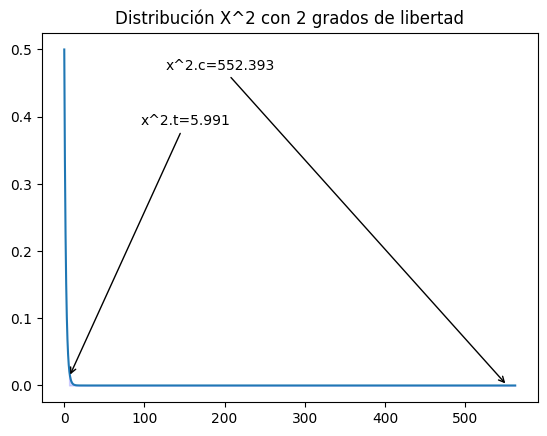

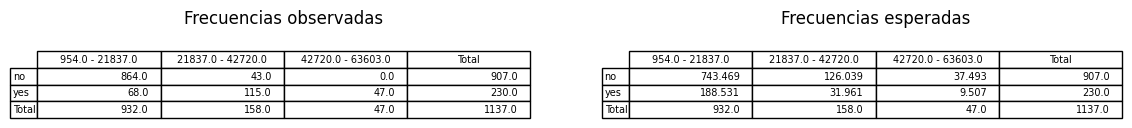

In [49]:
smoker_price_df = df.loc[:, ['Fumador', 'Costo Póliza']]
cost_min = round(df['Costo Póliza'].min(), 2)
cost_max = round(df['Costo Póliza'].max(), 2)

bin_value = round((cost_max - cost_min) / 3, 0)
smoker_values = np.around(np.clip([round(cost_min * 0.85, 0), cost_min  + bin_value, cost_max * 1.15], 0, a_max=None), 2)
smoker_values = np.arange(np.clip(round(cost_min * 0.85, 0), 0, a_max=None), cost_max + cost_min, bin_value)

observed_df = pd.DataFrame()
previous =  smoker_values[0]
for value in smoker_values[1:]:
    group = smoker_price_df.where((smoker_price_df['Costo Póliza'] >= previous) & (smoker_price_df['Costo Póliza'] < value)).groupby(by='Fumador', as_index=True).count().rename(columns={'Costo Póliza': f'{previous} - {value}'})
    previous = value
    observed_df = pd.concat([observed_df, group], axis=1).fillna(0)
    
col_total = observed_df.T.sum(skipna=False)
total_observed_df = pd.concat([observed_df, col_total.rename('Total')], axis=1)

row_total = total_observed_df.sum(skipna=False)
total_observed_df = pd.concat([total_observed_df, row_total.rename('Total').to_frame().T], axis=0)

total_observed_df.style.set_caption("Frecuencias observadas")
total_observed_df

expected_df = pd.DataFrame()
total = total_observed_df['Total']['Total']

for col in observed_df.columns.to_list():
    serie = pd.Series(dtype='float64')
    for row in observed_df.index.to_list():
        total_col = total_observed_df[col]['Total']
        total_row = total_observed_df['Total'][row]
        result = total_col * total_row / total
        serie.at[row] = result
    expected_df = pd.concat([expected_df, serie.to_frame(col)], axis=1)

total_expected_df = pd.concat([expected_df, col_total.rename('Total')], axis=1)
total_expected_df = pd.concat([total_expected_df, row_total.rename('Total').to_frame().T], axis=0)

total_expected_df

chi = observed_df.sub(expected_df).pow(2).div(expected_df)

chi_total = np.nansum(chi)
chi_gl = (len(observed_df.index) - 1) * (len(observed_df.columns) - 1)
chi_p = stats.chi2.sf(chi_total, chi_gl)
f_teoric = stats.chi2.ppf(0.95, chi_gl)

print(f'gl = {chi_gl}, calculado = {chi_total}, teórico = {f_teoric} y p-value = {chi_p}')

if (chi_total > f_teoric):
    print(f'se rechaza la hipotesis nula. El precio de la poliza no es independiente de si el contratante es fumador o no')
else:
    print(f'se comprueba la hipotesis nula. El precio de la poliza es independiente de si el contratante es fumador o no')
    
chi2_plot(chi_total, f_teoric, chi_gl);

### show tables
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (14, .25))

ax.table(cellText = total_observed_df.values, rowLabels = total_observed_df.index, colLabels = total_observed_df.columns)
ax.set_title('Frecuencias observadas')
ax.axis('off');

ax1.table(cellText = total_expected_df.values.round(3), rowLabels = total_expected_df.index, colLabels = total_expected_df.columns)
ax1.set_title('Frecuencias esperadas')
ax1.axis('off');

In [70]:
smoker_price_df = df.loc[:, ['Fumador', 'Costo Póliza']]
cost_min = round(df['Costo Póliza'].min(), 2)
cost_max = round(df['Costo Póliza'].max(), 2)

bin_value = round((cost_max - cost_min) / 3, 0)
smoker_values = np.around(np.clip([round(cost_min * 0.85, 0), cost_min  + bin_value, cost_max * 1.15], 0, a_max=None), 2)
smoker_values = np.arange(np.clip(round(cost_min * 0.85, 0), 0, a_max=None), cost_max + cost_min, bin_value)
#smoker_values = np.around(np.clip(np.arange(cost_min * 0.85, cost_max + bin_value / 2, bin_value), 0, a_max=None), 2)

observed_df = pd.DataFrame()
previous =  smoker_values[0]
for value in smoker_values[1:]:
    group = smoker_price_df.where((smoker_price_df['Costo Póliza'] >= previous) & (smoker_price_df['Costo Póliza'] < value)).groupby(by='Fumador', as_index=True).count().rename(columns={'Costo Póliza': f'{previous} - {value}'})
    previous = value
    observed_df = pd.concat([observed_df, group], axis=1).fillna(0)

print(f'{cost_min} {cost_max} {bin_value} {smoker_values}')

observed_df

1121.87 63770.43 20883.0 [  954. 21837. 42720. 63603.]


,954.0 - 21837.0,21837.0 - 42720.0,42720.0 - 63603.0
Fumador,,,
no,864,43,0.0
yes,68,115,47.0


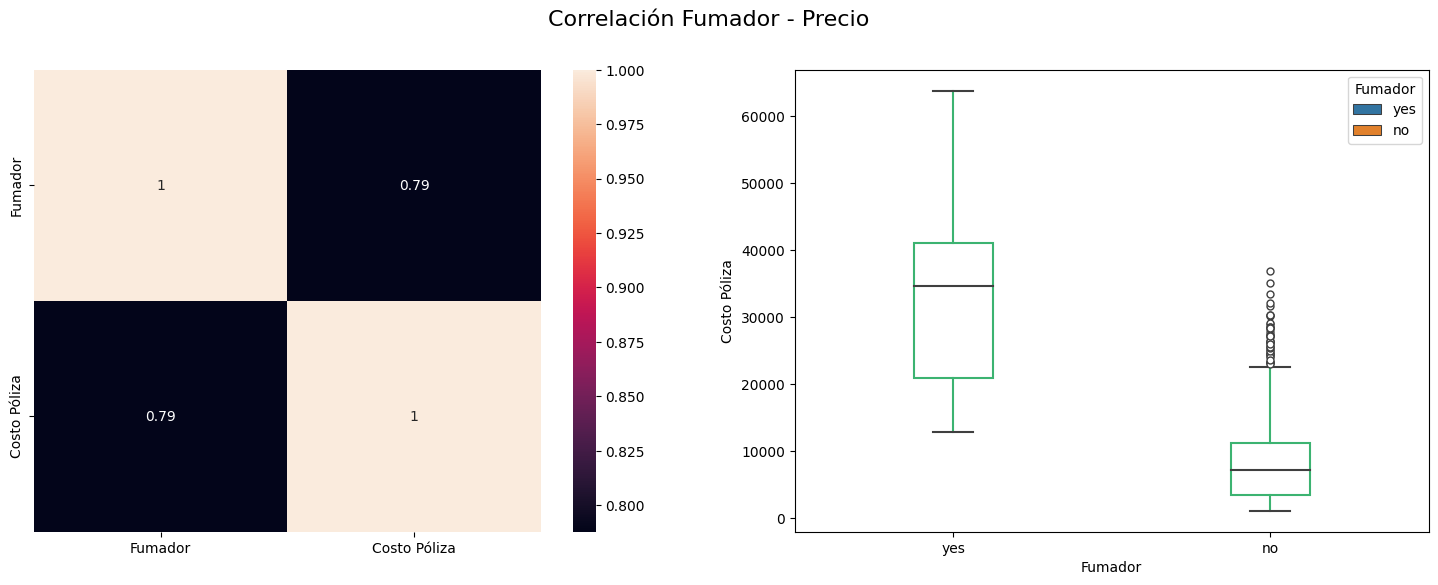

In [96]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 6))

fig.suptitle('Correlación Fumador - Precio', fontsize=16)
sns.heatmap(smoker_price_df.replace({'yes': True, 'no': False}).corr(method ='pearson'), annot=True, ax=ax1)

sns.boxplot(
    y='Costo Póliza',
    x='Fumador',
    data=df,
    dodge=False,
    ax = ax2,
    width=0.25,
    hue='Fumador',
    boxprops={'fill': None, 'color': 'mediumseagreen'},
    whiskerprops={'color':'mediumseagreen'},
    flierprops={'markerfacecolor':'white', 'markersize':5, 'linestyle':'none', 'marker': 'o'}
);

### Boxplot por edad

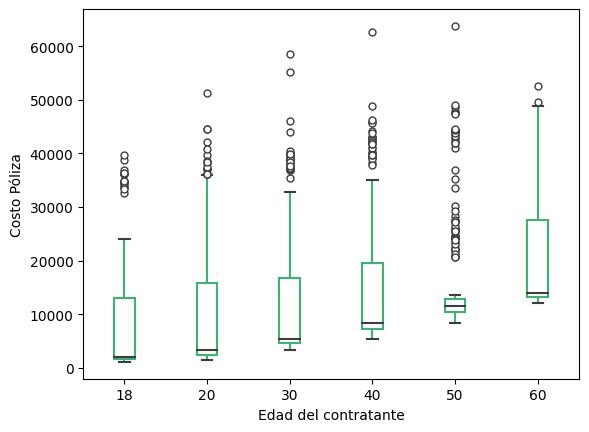

In [103]:
copy = df.copy()
copy['Edad del contratante'] = (copy['Edad del contratante']//10*10).replace(10 ,18)

a = sns.boxplot(
    y='Costo Póliza',
    x='Edad del contratante',
    data=copy,
    dodge=False,
    width=0.25,
    hue='Edad del contratante',
    boxprops={'fill': None, 'color': 'mediumseagreen'},
    whiskerprops={'color':'mediumseagreen'},
    flierprops={'markerfacecolor':'white', 'markersize':5, 'linestyle':'none', 'marker': 'o'}
)
a.get_legend().set_visible(False)